In [1]:
# Basic Imports
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

# Let's pull in the champions stats saved from the API

In [34]:
champ_stats = pd.read_csv('champ_stats.csv', index_col=0)

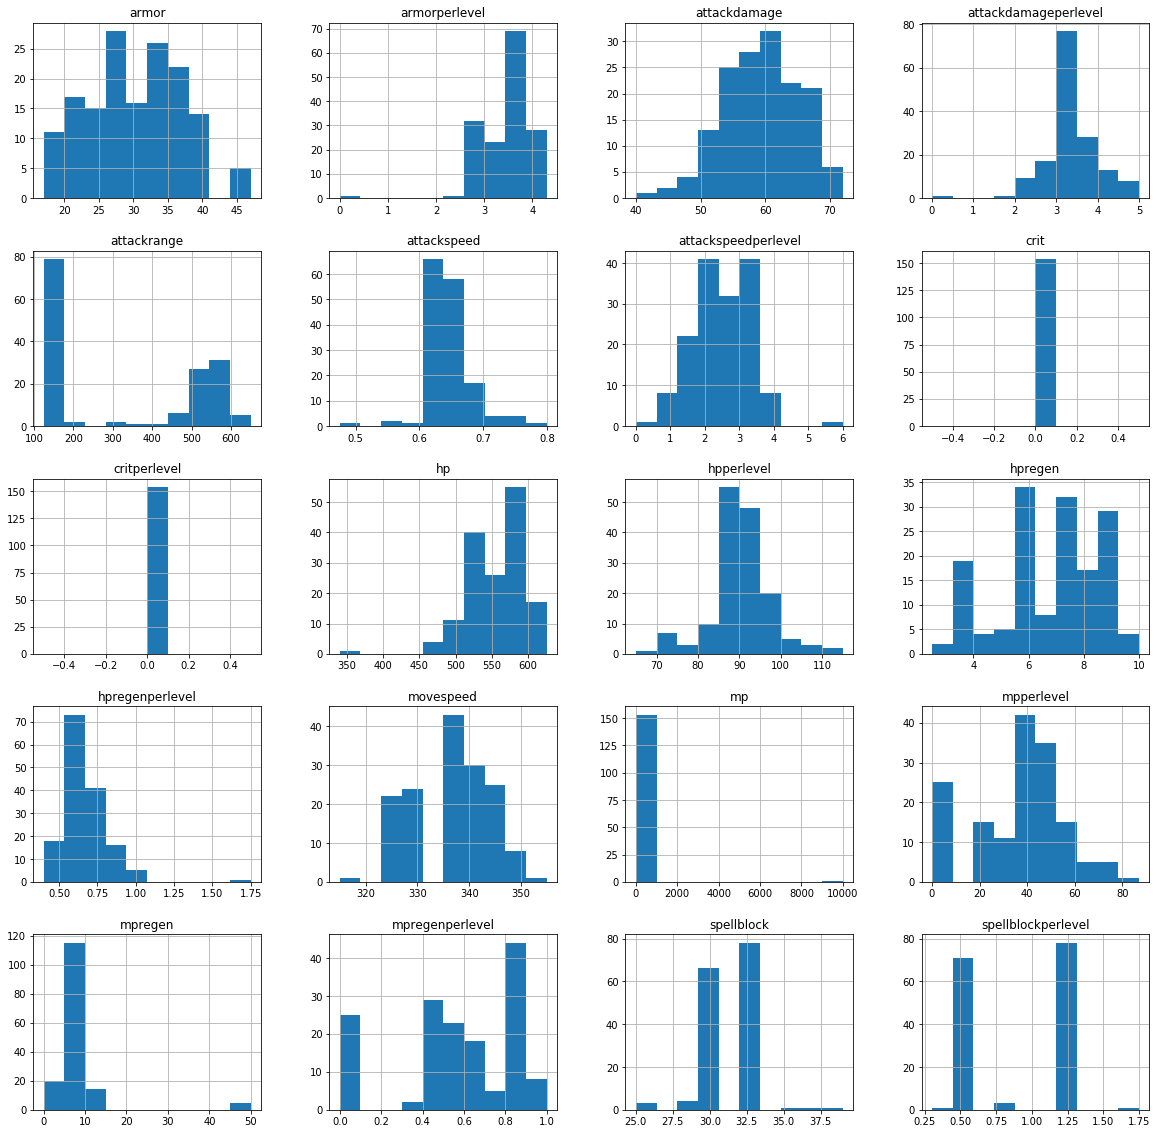

In [35]:
champ_stats.hist(figsize=(20,20))
plt.show()

Ther eseems to be a good spread for most of the base stats. As we will see throughout our analysis, there are some general rules in League, but there is always an exception to the rule so we will see outliers one each plot.

After seeing a near normal distribution on several of the base stats and their corresponding scaler (ie armor and armorperlevel), my expectation is that those champions with high base values would also scale the best. To put another way, if a champion has high armor at level 1, they would likely have high armor at level 18 (the maximum level in the game). 

- show plots of this not being the case for any of them in a similar style summary
- look at the level 1 and the level 18 plots for each stat and where the classes land.
- do a classifier to help understand  the classes

In [36]:
champ_stats['tags'] = champ_stats['tags'].str.replace("'", '') #remove the single quotes from the column
new = champ_stats['tags'].str.lstrip('[+-]').str.rstrip(']').str.split(', ', expand=True) #make a new with the split tags so that we get both classes

# making separate first class column from new data frame
champ_stats['Primary Class']= new[0]
# making separate second class column from new data frame
champ_stats['Secondary']= new[1]
champ_stats.drop(columns=['tags'], inplace=True) #dropping the old column
champ_stats

,hp,hpperlevel,mp,mpperlevel,movespeed,armor,armorperlevel,spellblock,spellblockperlevel,attackrange,...,mpregenperlevel,crit,critperlevel,attackdamage,attackdamageperlevel,attackspeedperlevel,attackspeed,partype,Class 1,Class 2
Orianna,530.0,91.0,418.00,25.0,325.0,17.0,3.00,26.0,0.50,525.0,...,0.80,0.0,0.0,40.0,2.60,3.50,0.658,Mana,Mage,Support
Janna,500.0,70.0,350.00,64.0,315.0,28.0,3.80,30.0,0.50,550.0,...,0.40,0.0,0.0,46.0,1.50,2.95,0.625,Mana,Support,Mage
Karthus,550.0,87.0,467.00,30.5,335.0,18.0,3.50,30.0,0.50,450.0,...,0.80,0.0,0.0,46.0,3.25,2.11,0.625,Mana,Mage,None
Lulu,525.0,74.0,350.00,55.0,330.0,29.0,3.70,30.0,0.50,550.0,...,0.60,0.0,0.0,47.0,2.60,2.25,0.625,Mana,Support,Mage
Neeko,540.0,90.0,450.00,30.0,340.0,21.0,4.00,30.0,0.50,550.0,...,0.70,0.0,0.0,48.0,2.50,3.50,0.625,Mana,Mage,Support
Kennen,541.0,84.0,200.00,0.0,335.0,29.0,3.75,30.0,0.50,550.0,...,0.00,0.0,0.0,48.0,3.75,3.40,0.625,Energy,Mage,Marksman
Sona,480.0,77.0,340.00,45.0,325.0,28.0,3.30,30.0,0.50,550.0,...,0.40,0.0,0.0,49.0,3.00,2.30,0.644,Mana,Support,Mage
Soraka,535.0,74.0,425.00,40.0,325.0,32.0,3.80,30.0,0.50,550.0,...,0.40,0.0,0.0,50.0,3.00,2.14,0.625,Mana,Support,Mage
Senna,520.0,75.0,350.00,45.0,330.0,28.0,3.50,30.0,0.50,600.0,...,0.40,0.0,0.0,50.0,0.00,4.00,0.625,Mana,Marksman,Support
Ivern,585.0,85.0,450.00,60.0,330.0,27.0,3.50,32.0,1.25,475.0,...,0.75,0.0,0.0,50.0,3.00,3.40,0.644,Mana,Support,Mage


In [5]:
champ_list = ['Aatrox', 'Darius', 'Malphite', 'Riven', 'Tristana', 'Warwick']

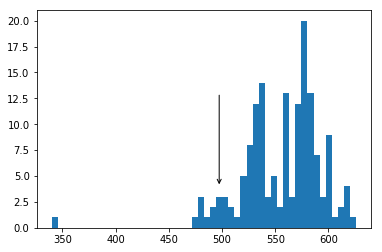

In [6]:
nbins = 50
labeled_bin = 500

fig, ax = plt.subplots()

# series = pd.Series(np.random.normal(0, 100, 1000))

## plot the histogram and return the bin position and values
ybins, xbins, _ = ax.hist(champ_stats['hp'], bins=nbins)

## find out in which bin belongs the position where you want the label
ind_bin = np.where(xbins >= labeled_bin)[0]
if len(ind_bin) > 0 and ind_bin[0] > 0:
    ## get position and value of the bin
    x_bin = xbins[ind_bin[0]-1]/2. + xbins[ind_bin[0]]/2.
    y_bin = ybins[ind_bin[0]-1]
    ## add the arrow
    ax.annotate("",
                xy=(x_bin, y_bin + 1), xycoords='data',
                xytext=(x_bin, y_bin + 10), textcoords='data',
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3"),
                                )
else:
    print('Labeled bin is outside range')

In [7]:
stats = ['armor', 'attackdamage', 'attackspeed', 'crit', 'hp', 'hpregen', 'mp', 'mpregen', 'spellblock']

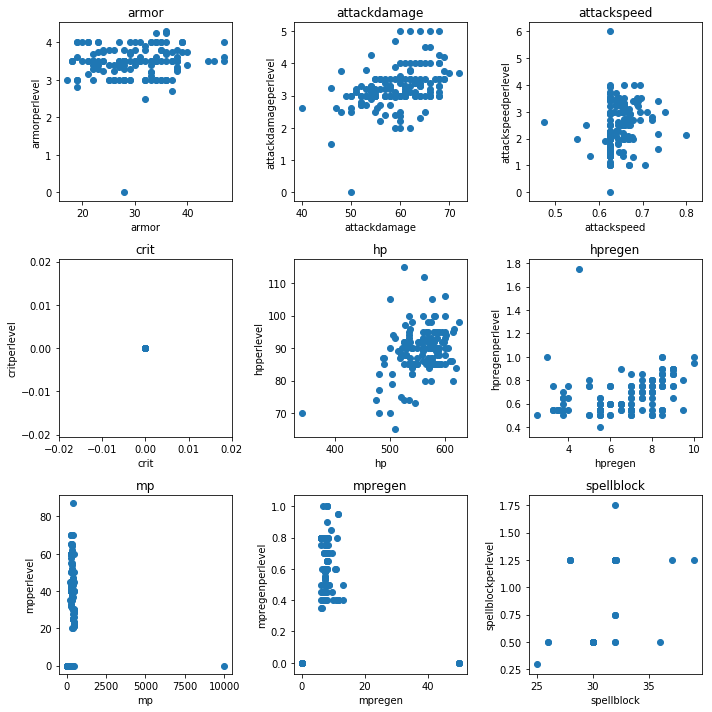

In [8]:
fig = plt.figure(figsize=(10, 10))

for stat,num in zip(stats, range(1,10)):
    ax = fig.add_subplot(3,3,num)
#     ax.plot(df0['Date'], df0[['y1','y2']])
    ax.scatter(champ_stats[stat], champ_stats[str(stat) + 'perlevel'])
    ax.set_ylabel(str(stat) + 'perlevel')
    ax.set_xlabel(str(stat))
    ax.set_title(stat)

plt.tight_layout()
plt.show()

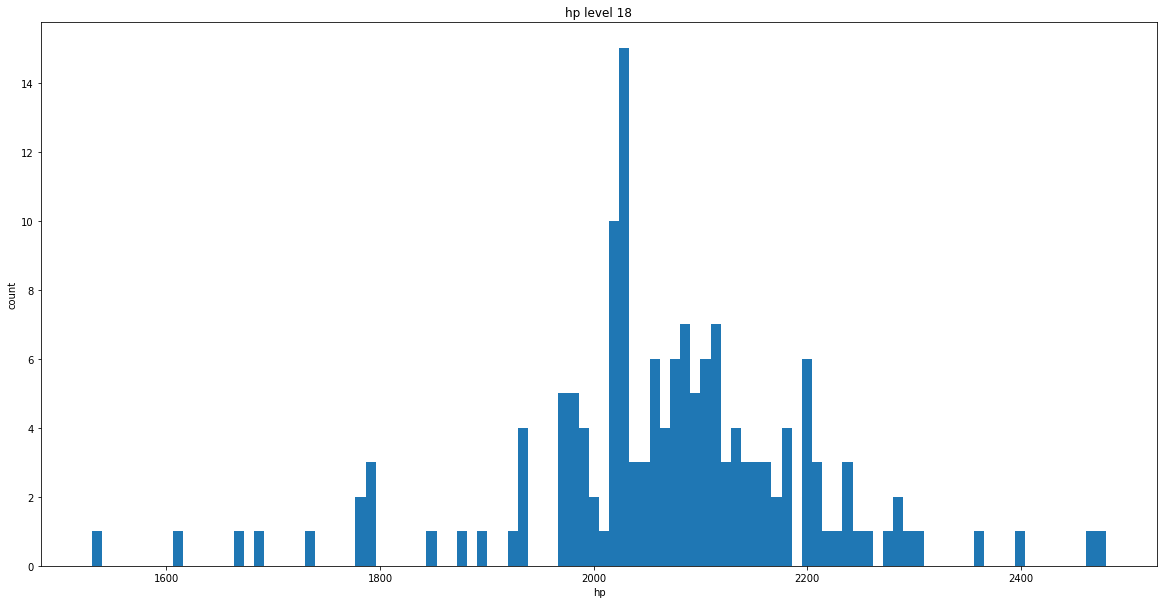

In [9]:
fig = plt.figure(figsize=(20, 10))
# plt.plot(champ_stats['Distance'][df['Activity Type']=='Run'].resample('M').sum())
plt.hist(champ_stats['hp']+(champ_stats['hpperlevel']*17), bins=100)
plt.title('hp level 18')
plt.ylabel('count')
plt.xlabel('hp')
plt.show()

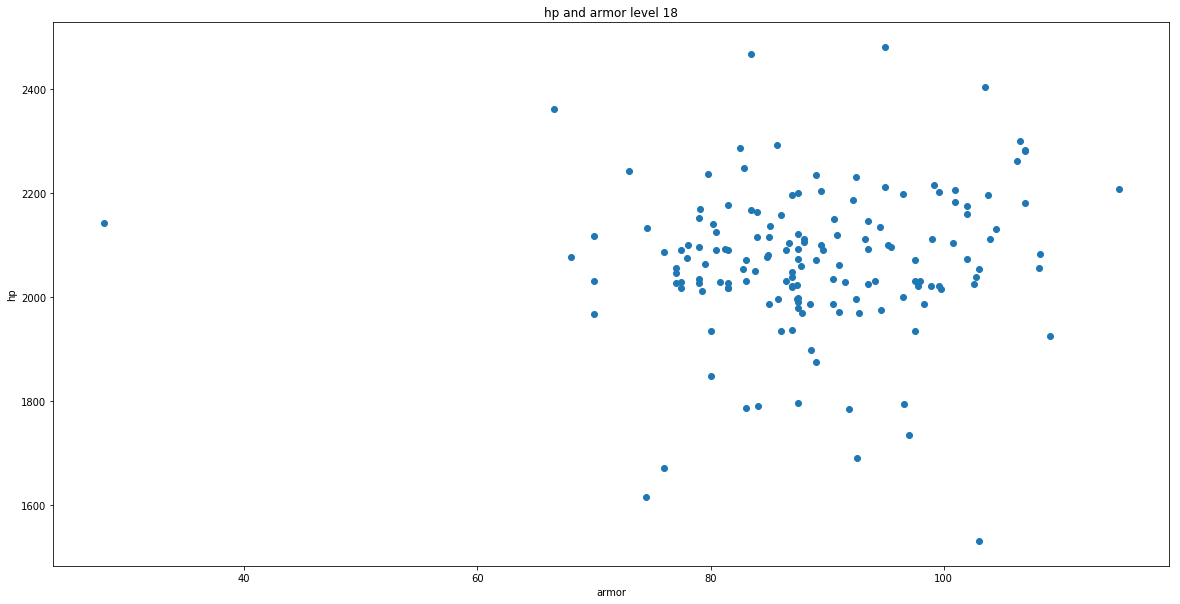

In [10]:
fig = plt.figure(figsize=(20, 10))
plt.scatter(champ_stats['armor']+(champ_stats['armorperlevel']*17), champ_stats['hp']+(champ_stats['hpperlevel']*17))
plt.title('hp and armor level 18')
plt.ylabel('hp')
plt.xlabel('armor')
plt.show()

In [50]:
# for encircling if that is desired
from scipy.spatial import ConvexHull
def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)
    
def encircle2(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    mean = np.mean(p, axis=0)
    d = p-mean
    r = np.max(np.sqrt(d[:,0]**2+d[:,1]**2 ))
    circ = plt.Circle(mean, radius=1.05*r,**kw)
    ax.add_patch(circ)

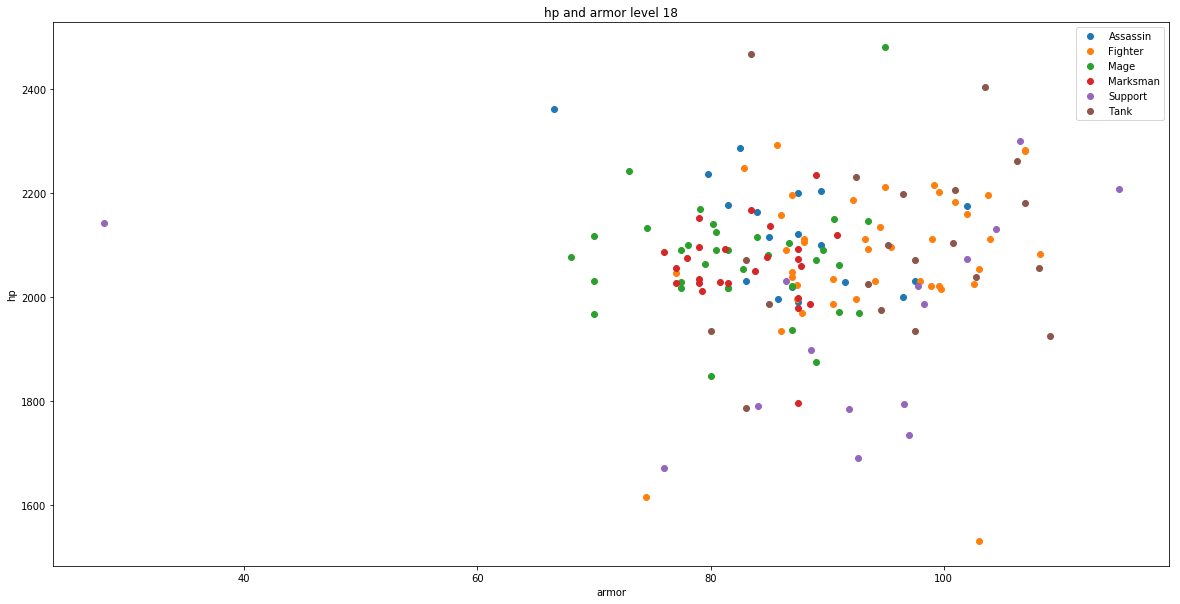

In [53]:
fig = plt.figure(figsize=(20, 10))
# plt.scatter(champ_stats['armor']+(champ_stats['armorperlevel']*17), champ_stats['hp']+(champ_stats['hpperlevel']*17))
groups = champ_stats.groupby('Primary Class')
for name, group in groups:
    plt.plot(group['armor']+(group['armorperlevel']*17), group['hp']+(group['hpperlevel']*17), marker="o", linestyle="", label=name)
plt.legend()
plt.title('hp and armor level 18')
plt.ylabel('hp')
plt.xlabel('armor')
plt.show()

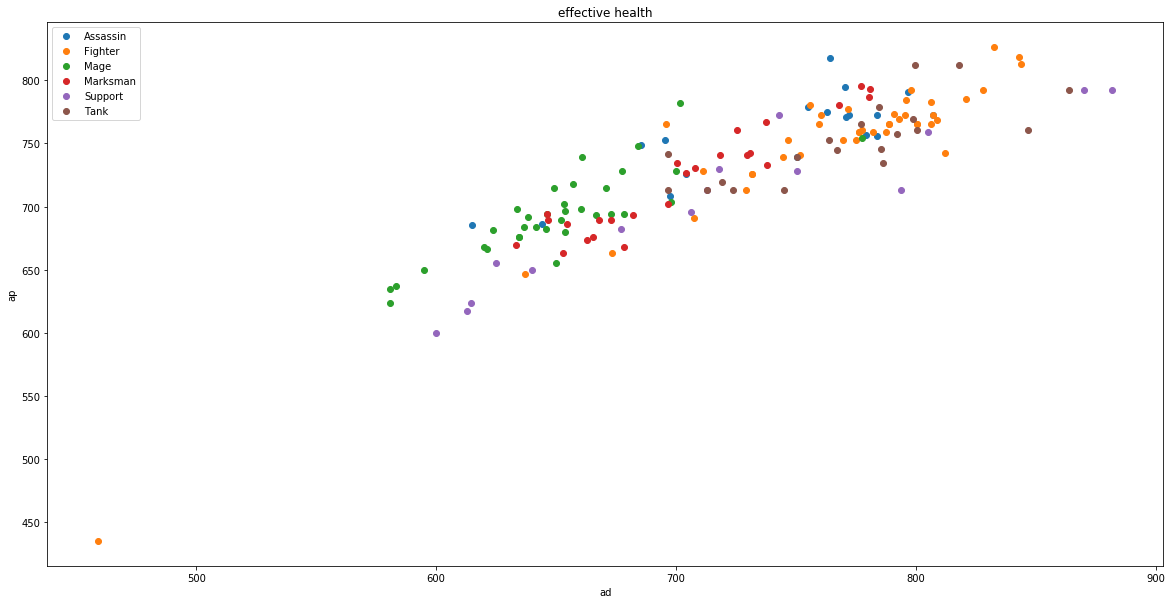

In [51]:
# need to do effective ad hp and ap 

champ_stats['Effective AD HP'] =  champ_stats['hp']*(1 + 0.01 * champ_stats['armor'])
champ_stats['Effective AP HP'] =  champ_stats['hp']*(1 + 0.01 * champ_stats['spellblock'])
fig = plt.figure(figsize=(20, 10))
# plt.scatter(ad_eff_hp, ap_eff_hp)
groups = champ_stats.groupby('Primary Class')
    
for name, group in groups:
    plt.plot(group['Effective AD HP'], group['Effective AP HP'], marker="o", linestyle="", label=name)
#     encircle(group['Effective AD HP'], group['Effective AP HP'], alpha=0.2))
    
plt.title('effective health')
plt.ylabel('ap')
plt.xlabel('ad')
plt.legend()
plt.show()

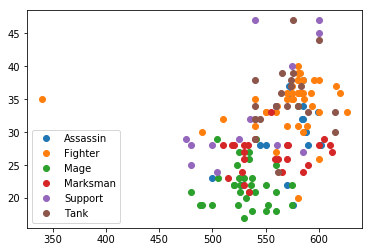

In [42]:
groups = champ_stats.groupby('Primary Class')
for name, group in groups:
    plt.plot(group['hp'], group['armor'], marker="o", linestyle="", label=name)
plt.legend()

In [12]:
champ_stats.columns

Index(['hp', 'hpperlevel', 'mp', 'mpperlevel', 'movespeed', 'armor',
       'armorperlevel', 'spellblock', 'spellblockperlevel', 'attackrange',
       'hpregen', 'hpregenperlevel', 'mpregen', 'mpregenperlevel', 'crit',
       'critperlevel', 'attackdamage', 'attackdamageperlevel',
       'attackspeedperlevel', 'attackspeed', 'tags', 'partype'],
      dtype='object')

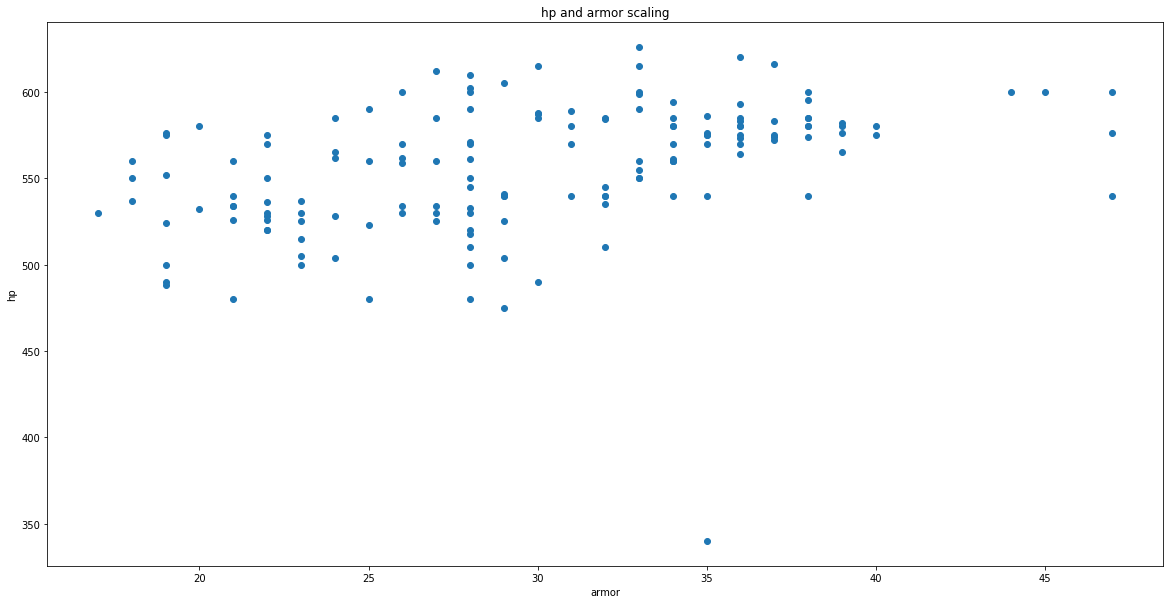

In [13]:
fig = plt.figure(figsize=(20, 10))
plt.scatter(champ_stats['armor'], champ_stats['hp'])
plt.title('hp and armor scaling')
plt.ylabel('hp')
plt.xlabel('armor')
plt.show()

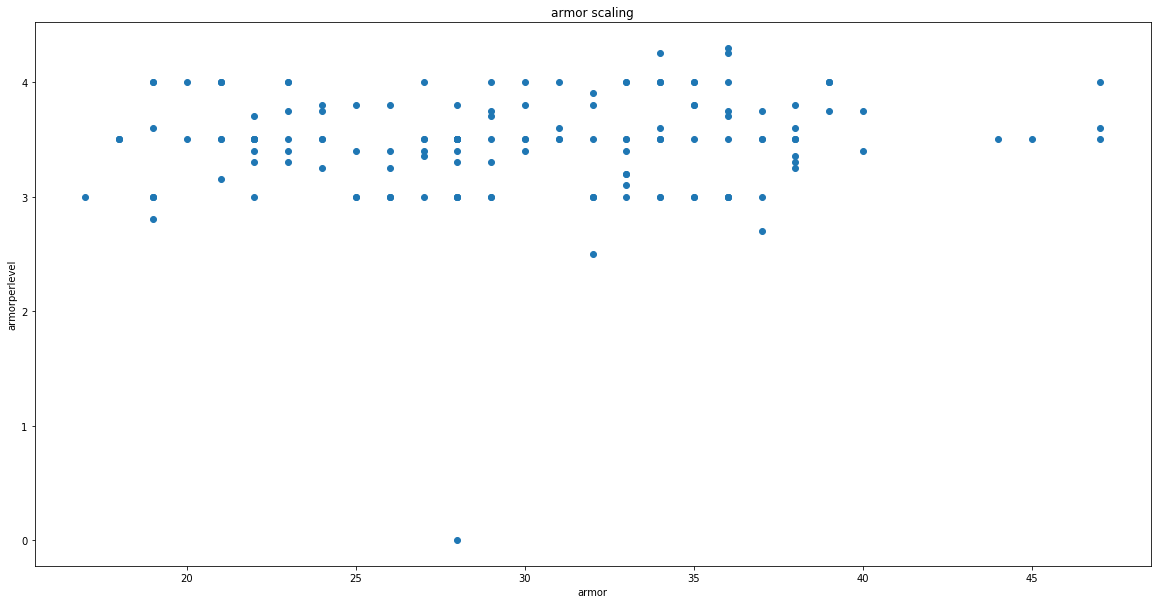

In [14]:
fig = plt.figure(figsize=(20, 10))
plt.scatter(champ_stats['armor'], champ_stats['armorperlevel'])
plt.title('armor scaling')
plt.ylabel('armorperlevel')
plt.xlabel('armor')
plt.show()

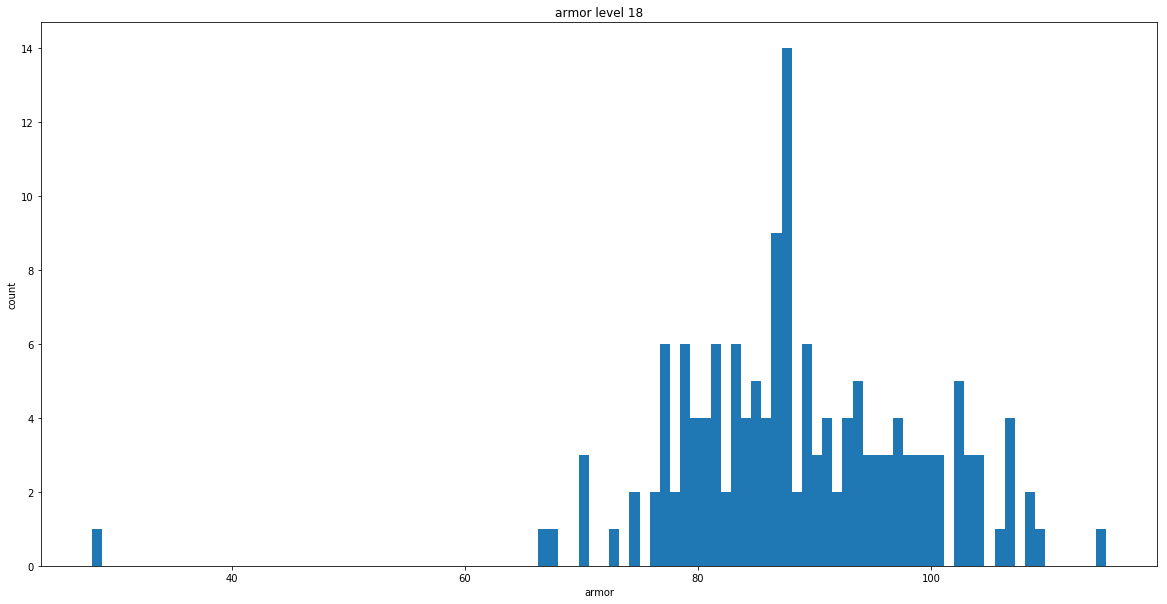

In [15]:
fig = plt.figure(figsize=(20, 10))
# plt.plot(champ_stats['Distance'][df['Activity Type']=='Run'].resample('M').sum())
plt.hist(champ_stats['armor']+(champ_stats['armorperlevel']*17), bins=100)
plt.title('armor level 18')
plt.ylabel('count')
plt.xlabel('armor')
plt.show()

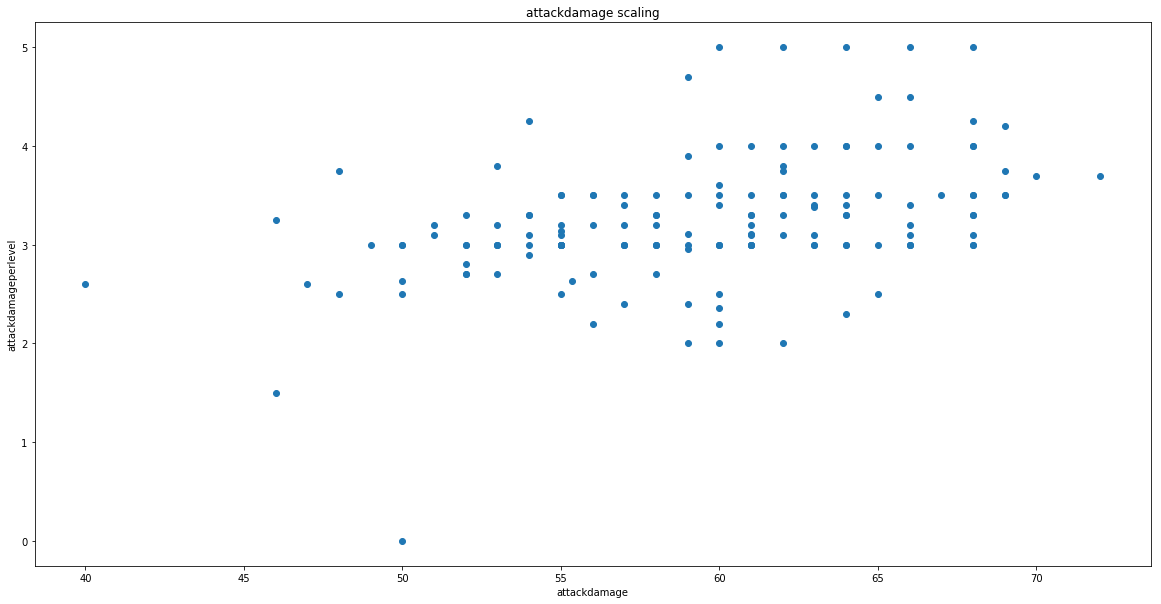

In [16]:
fig = plt.figure(figsize=(20, 10))
plt.scatter(champ_stats['attackdamage'], champ_stats['attackdamageperlevel'])
plt.title('attackdamage scaling')
plt.ylabel('attackdamageperlevel')
plt.xlabel('attackdamage')
plt.show()

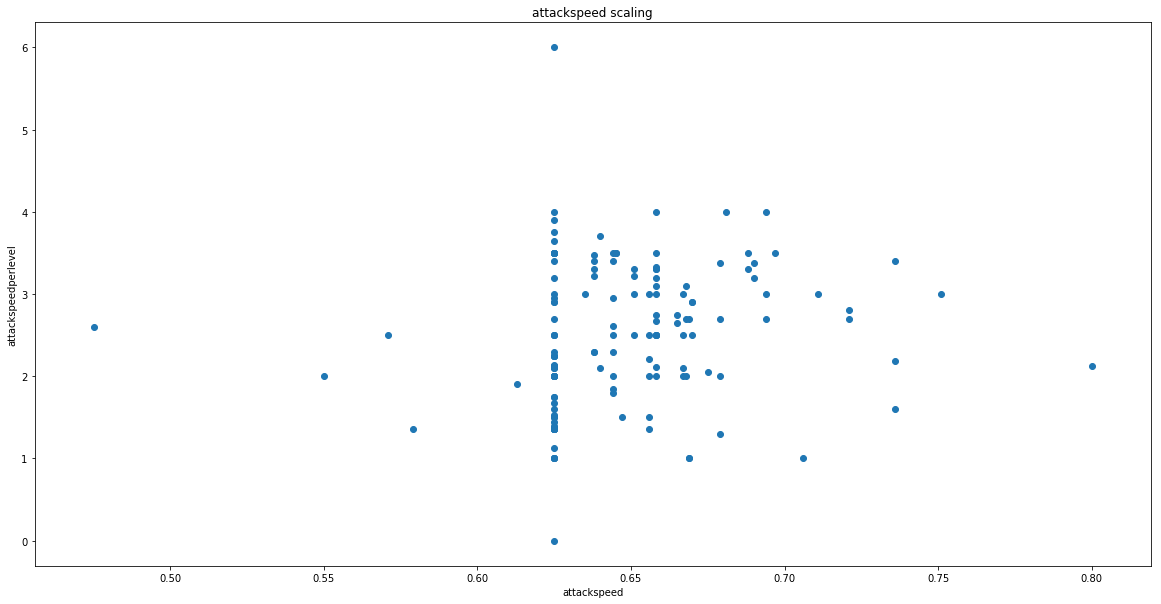

In [17]:
fig = plt.figure(figsize=(20, 10))
plt.scatter(champ_stats['attackspeed'], champ_stats['attackspeedperlevel'])
plt.title('attackspeed scaling')
plt.ylabel('attackspeedperlevel')
plt.xlabel('attackspeed')
plt.show()

# PCA

In [54]:
# preprocessing, pca, tsne, and kmeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [61]:
champ_stats.columns

Index(['hp', 'hpperlevel', 'mp', 'mpperlevel', 'movespeed', 'armor',
       'armorperlevel', 'spellblock', 'spellblockperlevel', 'attackrange',
       'hpregen', 'hpregenperlevel', 'mpregen', 'mpregenperlevel', 'crit',
       'critperlevel', 'attackdamage', 'attackdamageperlevel',
       'attackspeedperlevel', 'attackspeed', 'partype', 'Class 1', 'Class 2',
       'Effective AD HP', 'Effective AP HP'],
      dtype='object')

In [95]:
features = ['hp', 'hpperlevel', 'mp', 'mpperlevel', 'movespeed', 'armor',
       'armorperlevel', 'spellblock', 'spellblockperlevel', 'attackrange',
       'hpregen', 'hpregenperlevel', 'mpregen', 'mpregenperlevel', 'crit',
       'critperlevel', 'attackdamage', 'attackdamageperlevel',
       'attackspeedperlevel', 'attackspeed']
x = champ_stats.loc[:, features]
# add in one hot encoded partype
partype_df = pd.get_dummies(champ_stats['partype'])
x = pd.concat([x, partype_df], axis=1)
y = champ_stats.index

In [96]:

# standardizing the features
x_minmax = MinMaxScaler().fit_transform(x)

# pca projection into 2D
pca = PCA(n_components = 2)
principal_components_minmax = pca.fit_transform(x_minmax)

# explained variance ratio
print(pca.explained_variance_ratio_)

[0.36954855 0.2079252 ]


/Users/jeremywalsh/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [97]:
pca.components_.shape

(2, 33)

In [98]:

# inputting into df for plotting
principal_df = pd.DataFrame(data = principal_components_minmax, 
                           columns = ['principal component 1', 'principal component 2'])

# recombining champion names and components
final_df = pd.concat([principal_df,pd.DataFrame(y)], axis = 1)
final_df.rename(columns={0: 'name'},inplace=True)

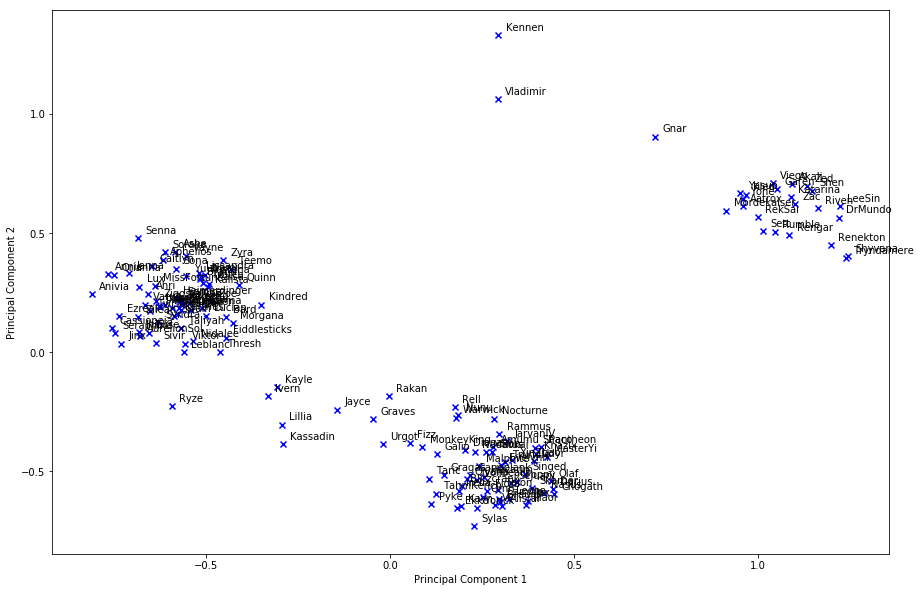

In [99]:
# plotting with minmax scaling
fig, ax = plt.subplots(figsize = (15, 10))

for i, key in enumerate(final_df['name']):
    # instantiates each x and y coordinate
    x_axis = principal_df['principal component 1'][i]
    y_axis = principal_df['principal component 2'][i]
    
    # creates scatterplot points
    ax.scatter(x_axis, y_axis, marker = 'x', color = 'b')
    
    # adds champion name to each point
    ax.text(x_axis + 0.02 , y_axis + 0.02, key, fontsize = 10)


plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show();

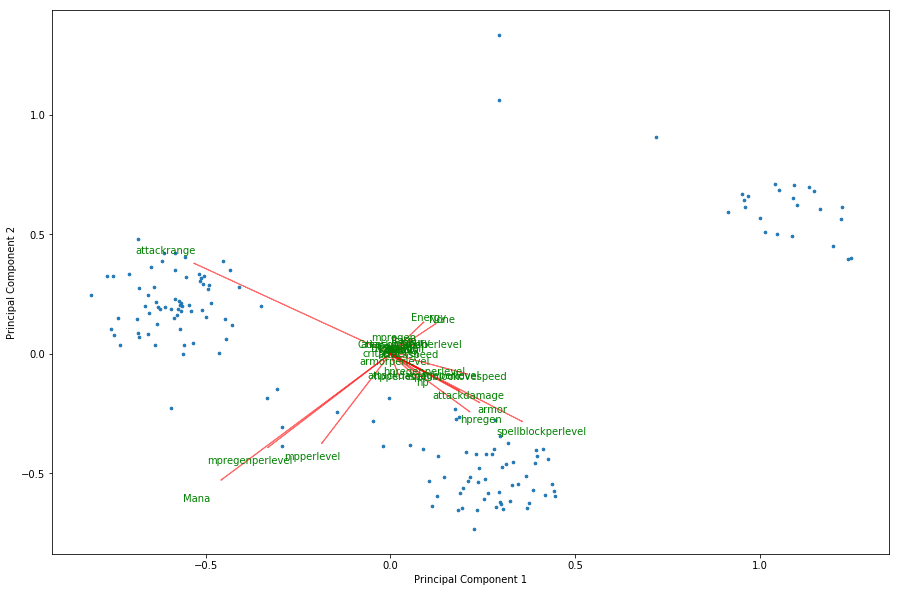

In [100]:
# byplot to figure out the relative magnitude of each feature on each component
fig, ax = plt.subplots(figsize = (15, 10))

# mapping out each feature with coeff
coeff = np.transpose(pca.components_[0:2, :])
x_axis = principal_components_minmax[:, 0]
y_axis = principal_components_minmax[:, 1]
n = coeff.shape[0]

# list of labels for different features
labels = list(x.columns)

# plotting points
ax.scatter(x_axis, y_axis, s = 7)

# labels each arrow with appropriate feature
for i in range(n):
    ax.arrow(0, 0, coeff[i, 0], coeff[i, 1],color = 'r', alpha = 0.5)
    ax.text(coeff[i, 0]* 1.15, coeff[i, 1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
    
plt.show();

It seems the three groups are at the top right, champions that don't use mana, at the bottom middle melee champions that use mana, and the left grouping being mana using ranged champions.

In [101]:
# logistic regression

In [105]:
x

,hp,hpperlevel,mp,mpperlevel,movespeed,armor,armorperlevel,spellblock,spellblockperlevel,attackrange,...,Energy,Ferocity,Flow,Fury,Grit,Heat,Mana,None,Rage,Shield
Orianna,530.0,91.0,418.00,25.0,325.0,17.0,3.00,26.0,0.50,525.0,...,0,0,0,0,0,0,1,0,0,0
Janna,500.0,70.0,350.00,64.0,315.0,28.0,3.80,30.0,0.50,550.0,...,0,0,0,0,0,0,1,0,0,0
Karthus,550.0,87.0,467.00,30.5,335.0,18.0,3.50,30.0,0.50,450.0,...,0,0,0,0,0,0,1,0,0,0
Lulu,525.0,74.0,350.00,55.0,330.0,29.0,3.70,30.0,0.50,550.0,...,0,0,0,0,0,0,1,0,0,0
Neeko,540.0,90.0,450.00,30.0,340.0,21.0,4.00,30.0,0.50,550.0,...,0,0,0,0,0,0,1,0,0,0
Kennen,541.0,84.0,200.00,0.0,335.0,29.0,3.75,30.0,0.50,550.0,...,1,0,0,0,0,0,0,0,0,0
Sona,480.0,77.0,340.00,45.0,325.0,28.0,3.30,30.0,0.50,550.0,...,0,0,0,0,0,0,1,0,0,0
Soraka,535.0,74.0,425.00,40.0,325.0,32.0,3.80,30.0,0.50,550.0,...,0,0,0,0,0,0,1,0,0,0
Senna,520.0,75.0,350.00,45.0,330.0,28.0,3.50,30.0,0.50,600.0,...,0,0,0,0,0,0,1,0,0,0
Ivern,585.0,85.0,450.00,60.0,330.0,27.0,3.50,32.0,1.25,475.0,...,0,0,0,0,0,0,1,0,0,0


In [129]:
# evaluate multinomial logistic regression model
from sklearn.linear_model import LogisticRegression
# # define dataset
# X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=3, random_state=1)
# define the multinomial logistic regression model
model = LogisticRegression()
# fit the model on the whole dataset
model.fit(x.values,champ_stats['Class 1'])
# # define a single row of input data
# row = [1.89149379, -0.39847585, 1.63856893, 0.01647165, 1.51892395, -3.52651223, 1.80998823, 0.58810926, -0.02542177, -0.52835426]
# # predict the class label
# yhat = model.predict([row])
# # summarize the predicted class
# print('Predicted Class: %d' % yhat[0])

/Users/jeremywalsh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jeremywalsh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [142]:
# x.columns
# model.coef_.shape
pd.DataFrame(model.coef_, x.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

ValueError: Shape of passed values is (33, 6), indices imply (1, 33)

In [131]:
model.coef_

array([[ 1.09642228e-02, -2.72826772e-02,  7.64202539e-04,
        -3.21196386e-03, -9.19853384e-04, -2.28614046e-01,
        -4.89941384e-01,  1.72499001e-01, -2.69786401e-01,
        -1.07173020e-02,  1.70325492e-01, -5.20651118e-01,
         1.12222671e-02, -1.27657518e-01,  0.00000000e+00,
         0.00000000e+00,  2.08465969e-02, -8.64300611e-01,
         3.79913096e-01,  2.84117683e-02, -3.96462333e-03,
        -6.32647510e-03, -2.44885145e-02,  1.04186345e-01,
         5.62657849e-01,  7.06237949e-02, -3.32804696e-01,
        -6.00141497e-02, -2.37414772e-01,  1.36223417e-01,
        -3.70029072e-02, -2.40756860e-01, -1.17983794e-02],
       [ 6.41798893e-03, -4.45364347e-02, -2.35044020e-03,
        -8.38335150e-04, -1.60171565e-04, -2.57145003e-02,
         5.17749023e-01, -3.25238296e-01, -1.47110421e-01,
        -9.47370155e-03, -1.02244272e-01,  4.27172840e-01,
        -4.61184604e-02,  5.00398718e-01,  0.00000000e+00,
         0.00000000e+00,  1.53875807e-01,  8.15163564e-

In [154]:
# model.coef_
# pd.DataFrame(model.coef_, x.columns, columns=['Coefficient'])
pd.DataFrame(model.coef_[0], x.columns, columns=['Coefficient']).sort_values(by='Coefficient', ascending=False)

,Coefficient
Ferocity,0.562658
attackspeedperlevel,0.379913
spellblock,0.172499
hpregen,0.170325
Mana,0.136223
Energy,0.104186
Flow,0.070624
attackspeed,0.028412
attackdamage,0.020847
mpregen,0.011222


In [138]:
# x.index
champ_stats['Class 1'].unique()

array(['Mage', 'Support', 'Marksman', 'Fighter', 'Tank', 'Assassin'],
      dtype=object)

In [ ]:
# clustering